In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
t_simb = 100;
t = np.arange(-10*t_simb, 10*t_simb+1)

g_t = np.sinc(t/t_simb)
g_t = g_t/np.sqrt(sum(pow(g_t,2)))

In [3]:
import random
A = [-3, -1, 1, 3]

a = np.zeros(10)
simb = np.zeros(1000)

for k in range(10):
    a[k] = random.choice(A)
    simb[k*t_simb] = a[k]


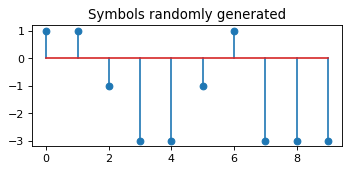

In [34]:
plt.figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')
plt.stem(simb[:1000:100])
plt.title('Symbols randomly generated')
plt.show()

In [5]:
simb[:1000:100]

array([ 1.,  1., -1., -3., -3., -1.,  1., -3., -3., -3.])

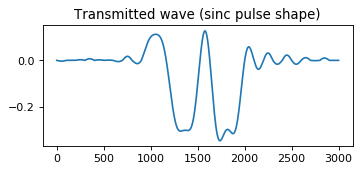

In [36]:
plt.figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')
signal = np.convolve(simb, g_t)
plt.title('Transmitted wave (sinc pulse shape)')
plt.plot(signal)
plt.show()

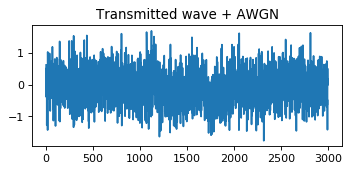

In [33]:
noise = .5*np.random.normal(0,1,len(signal)) # AWGN u = 0, var = 1
r_t = signal + noise

plt.figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')

plt.title('Transmitted wave + AWGN')
plt.plot(r_t)
plt.show()


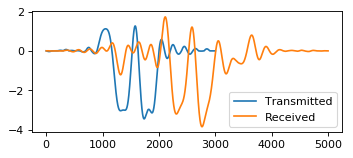

In [38]:
y = np.convolve(r_t, g_t)
sim_hat = y[2000:3000:100]

plt.figure(num=None, figsize=(5,2), dpi=80, facecolor='w', edgecolor='k')
plt.plot(signal*10)
plt.plot(y)
plt.legend(('Transmitted*10','Received'))
plt.show()

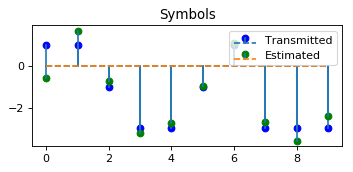

In [72]:
plt.figure(num=None, figsize=(5,2), dpi=80, facecolor='w', edgecolor='k')
plt.stem(simb[:1000:100], markerfmt='bo', basefmt="--")
plt.stem(y[2000:3000:100], markerfmt='go', basefmt="--")
plt.legend(('Transmitted', 'Estimated'))
plt.title('Symbols')
plt.show()